<a href="https://colab.research.google.com/github/Seema1004/Assignment/blob/main/Project_Step_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
#initialize the libraries
!pip install scikit-learn

!pip install lazypredict #AutoAI generator

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.io import arff

from sklearn.metrics import precision_score, recall_score, f1_score #import the missing functions

In [115]:
df_clean = pd.read_csv("AirTravelSatisfaction_SPR25.csv")

In [116]:
df_clean.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'InflightWifiService', 'ArrivalDelay',
       'Frequent Flyer Miles', 'Travel Purpose Detail'],
      dtype='object')

In [117]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4999 non-null   int64  
 1   Gender                             4999 non-null   object 
 2   Customer Type                      4999 non-null   object 
 3   Age                                4999 non-null   int64  
 4   Type of Travel                     4999 non-null   object 
 5   Class                              4999 non-null   object 
 6   Flight Distance                    4999 non-null   int64  
 7   Inflight wifi service              4999 non-null   int64  
 8   Departure/Arrival time convenient  4999 non-null   int64  
 9   Ease of Online booking             4750 non-null   float64
 10  Gate location                      4999 non-null   int64  
 11  Food and drink                     4999 non-null   int64

In [118]:
df_clean.columns = df_clean.columns.str.replace(' ', '_')

**DATA PREPARATION**

In [119]:
# # Basic preprocessing
#df['Experience'] = df['satisfaction'].apply(lambda x: 'Satisfied' if x == 'satisfied' else 'Not Satisfied')
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')


In [120]:
#connverting gender to a ecoded value - MALE - 0 , FEMALE - 1

df_clean['Gender_encoded'] = df_clean['Gender'].map({'MALE': 0, 'FEMALE': 1})


In [121]:
df_clean.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction', 'InflightWifiService', 'ArrivalDelay',
       'Frequent_Flyer_Miles', 'Travel_Purpose_Detail', 'Gender_encoded'],
      dtype='object')

In [122]:
df_clean.isnull().sum()

,0
id,0
Gender,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Flight_Distance,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Ease_of_Online_booking,249


In [123]:
df_clean['Experience'] = df_clean['satisfaction'].apply(lambda x: 'Satisfied' if x == 'satisfied' else 'Not Satisfied')

In [124]:
df_clean.drop(columns=['id','ArrivalDelay', 'InflightWifiService', 'Ease_of_Online_booking','Flight_Distance', 'Gender_encoded','Gate_location', 'Gender', 'Baggage_handling', 'Online_boarding'], inplace=True)


In [125]:
df_clean.columns

Index(['Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Inflight_wifi_service', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Checkin_service',
       'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes', 'satisfaction', 'Frequent_Flyer_Miles',
       'Travel_Purpose_Detail', 'Experience'],
      dtype='object')

In [126]:
#2. Departure_Delay_Category
#Groups delay time into:'Short' (0–15 minutes) 'Medium' (16–60 minutes)'Long' (over 60 minutes)
#Useful for converting a wide numerical range into clear categories.

df_clean['Departure_Delay_Category'] = pd.cut(
    df_clean['Departure_Delay_in_Minutes'],
    bins=[-1, 15, 60, float('inf')],
    labels=['Short', 'Medium', 'Long']
)


In [16]:
#start with filling missing values - median for numerical column and mode for categorical column



In [127]:
df_clean['Cleanliness'] = df_clean['Cleanliness'].fillna(df_clean['Cleanliness'].median())

In [128]:
df_clean['Leg_room_service'] = df_clean['Leg_room_service'].fillna(df_clean['Leg_room_service'].median())


In [129]:
# 1. Handle missing numeric columns using median
df_clean['Arrival_Delay_in_Minutes'] = df_clean['Arrival_Delay_in_Minutes'].fillna(
    df_clean['Arrival_Delay_in_Minutes'].median())

df_clean['Frequent_Flyer_Miles'] = df_clean['Frequent_Flyer_Miles'].fillna(
    df_clean['Frequent_Flyer_Miles'].median())

# 2. Handle missing categorical columns using mode
df_clean['Travel_Purpose_Detail'] = df_clean['Travel_Purpose_Detail'].fillna(
    df_clean['Travel_Purpose_Detail'].mode()[0])

In [130]:
df_clean.isnull().sum()

,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Food_and_drink,0
Seat_comfort,0
Inflight_entertainment,0
On-board_service,0


In [71]:
#normalize numerical columns - These columns have wide range of values hence need
#to normalize them for algorithms to not be distorted. The values range between 0-1 for these columns
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
cols_to_normalize = [
    'Departure_Delay_in_Minutes',
    'Arrival_Delay_in_Minutes',
    'Frequent_Flyer_Miles'
]

scaler = MinMaxScaler()
df_clean[cols_to_normalize] = scaler.fit_transform(df_clean[cols_to_normalize])

# Preview result
df_clean[cols_to_normalize].head()

,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Frequent_Flyer_Miles
0,0.01,0.03,0.32
1,0.00,0.01,0.02
2,0.00,0.00,0.76
3,0.01,0.02,0.89
4,0.00,0.00,0.23


In [131]:
df_clean.isnull().sum()

,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Food_and_drink,0
Seat_comfort,0
Inflight_entertainment,0
On-board_service,0


In [132]:
df_clean

,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,Departure/Arrival_time_convenient,Food_and_drink,Seat_comfort,Inflight_entertainment,On-board_service,...,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Frequent_Flyer_Miles,Travel_Purpose_Detail,Experience,Departure_Delay_Category
0,Loyal Customer,82,Personal Travel,Eco Plus,3,4,5,5,5,4,...,4,5,5.00,24,16.00,neutral or dissatisfied,15795.00,Leisure,Not Satisfied,Medium
1,disloyal Customer,79,Business travel,Business,3,2,1,1,1,1,...,1,4,1.00,0,5.00,neutral or dissatisfied,860.00,Conference,Not Satisfied,Short
2,Loyal Customer,80,Business travel,Business,2,2,5,5,5,4,...,4,4,5.00,0,0.00,satisfied,38158.00,Leisure,Satisfied,Short
3,Loyal Customer,79,Business travel,Business,2,5,2,2,2,2,...,1,4,2.00,11,8.00,satisfied,44732.00,Leisure,Satisfied,Short
4,Loyal Customer,79,Business travel,Business,3,3,4,5,3,3,...,3,3,3.00,0,0.00,satisfied,11284.00,Family Visit,Satisfied,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,Loyal Customer,81,Personal Travel,Business,1,1,4,4,4,1,...,4,3,4.00,1,0.00,neutral or dissatisfied,30075.00,Work Trip,Not Satisfied,Short
4995,Loyal Customer,78,Business travel,Business,2,2,4,5,4,4,...,5,4,3.00,0,0.00,neutral or dissatisfied,9359.00,Family Visit,Not Satisfied,Short
4996,Loyal Customer,80,Personal Travel,Eco,1,4,2,5,5,5,...,3,5,5.00,35,31.00,neutral or dissatisfied,36661.00,Work Trip,Not Satisfied,Medium
4997,disloyal Customer,81,Business travel,Eco,2,5,2,2,2,2,...,5,3,2.00,0,0.00,neutral or dissatisfied,39579.00,Family Visit,Not Satisfied,Short


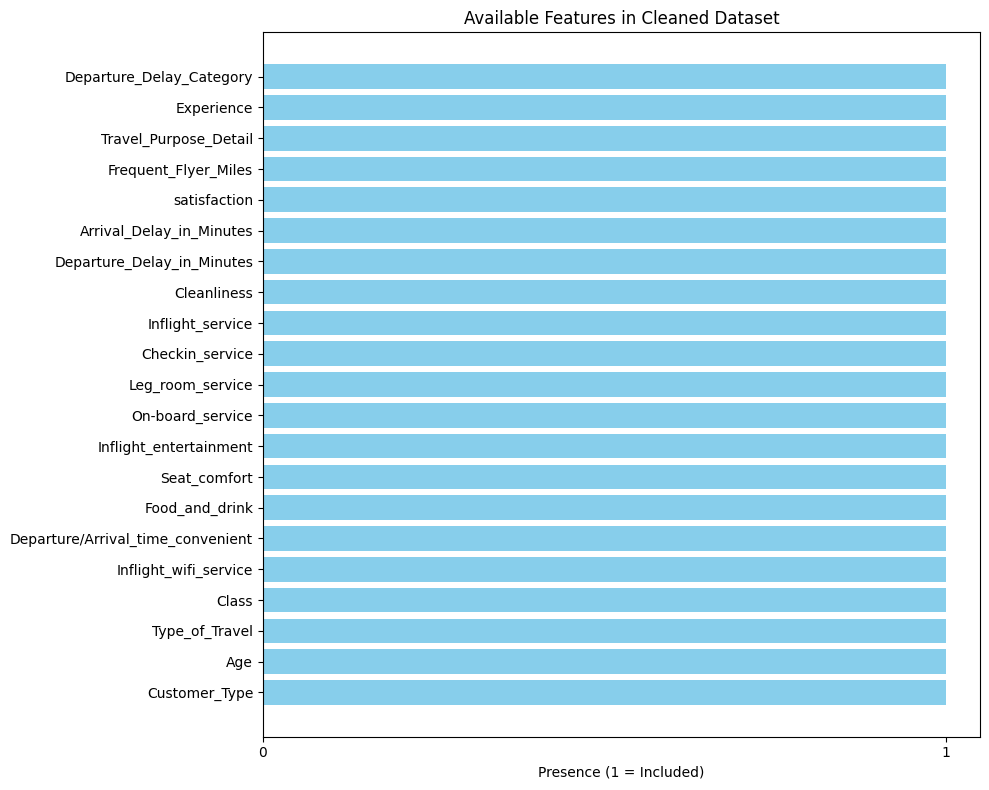

In [133]:
# Get the list of column names
columns = df_clean.columns.tolist()

# Create dummy counts (all 1s) just to plot the column names
counts = [1] * len(columns)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(columns, counts, color='skyblue')
plt.title("Available Features in Cleaned Dataset")
plt.xlabel("Presence (1 = Included)")
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

**Feature Engineering**

In [134]:
#here creating new columns based on the data set
#1.Sum of all customer-rated service features (e.g., Wi-Fi, seat comfort, food).
#Ranges vary depending on how many components were scored.
#Helps the model understand overall customer experience.

service_cols = [
    'Seat_comfort',
    'Food_and_drink',
    'Inflight_entertainment',
    'On-board_service',
    'Leg_room_service',
    'Cleanliness', 'Inflight_service'
]
df_clean['Service_Total'] = df_clean[service_cols].sum(axis=1)

In [135]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer_Type                      4999 non-null   object  
 1   Age                                4999 non-null   int64   
 2   Type_of_Travel                     4999 non-null   object  
 3   Class                              4999 non-null   object  
 4   Inflight_wifi_service              4999 non-null   int64   
 5   Departure/Arrival_time_convenient  4999 non-null   int64   
 6   Food_and_drink                     4999 non-null   int64   
 7   Seat_comfort                       4999 non-null   int64   
 8   Inflight_entertainment             4999 non-null   int64   
 9   On-board_service                   4999 non-null   int64   
 10  Leg_room_service                   4999 non-null   float64 
 11  Checkin_service                    4999 non

In [136]:
df_clean.drop(columns=['Seat_comfort',
    'Food_and_drink',
    'Inflight_entertainment',
    'On-board_service',
    'Leg_room_service',
    'Cleanliness', 'Inflight_service'], inplace=True)


In [ ]:
df_clean.to_csv("prepared_air_travel_dataset.csv", index=False)

**DATA MODELING**

In [137]:
# The idea is to use 6 different models and check which one suits better for the dataset

#1. Logistic Regression

#this needs more cleanup -

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [138]:
label_encoder = LabelEncoder()

df_clean['Departure_Delay_Category'] = label_encoder.fit_transform(df_clean['Departure_Delay_Category'])

df_clean['Customer_Type'] = label_encoder.fit_transform(df_clean['Customer_Type'])

df_clean['Type_of_Travel'] = label_encoder.fit_transform(df_clean['Type_of_Travel'])

df_clean['Class'] = label_encoder.fit_transform(df_clean['Class'])

df_clean['Travel_Purpose_Detail'] = label_encoder.fit_transform(df_clean['Travel_Purpose_Detail'])

df_clean['Experience'] = label_encoder.fit_transform(df_clean['Experience'])

In [163]:
df_clean.to_csv("prepared_air_travel_dataset.csv", index=False)

In [139]:
#model training
X = df_clean.drop(columns = ["satisfaction", "Experience"], axis=1)
y = df_clean['Experience']

#normalize the numeric columns
numeric_cols = X.select_dtypes(include='number').columns
df_clean[numeric_cols].describe()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
# Check for NaNs in X_train before training
print("Checking for NaNs in X_train before training:")
print(X_train.isnull().sum().sort_values(ascending=False).head())


Checking for NaNs in X_train before training:
Customer_Type            0
Age                      0
Type_of_Travel           0
Class                    0
Inflight_wifi_service    0
dtype: int64


In [141]:
X_train.columns

Index(['Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Inflight_wifi_service', 'Departure/Arrival_time_convenient',
       'Checkin_service', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes', 'Frequent_Flyer_Miles',
       'Travel_Purpose_Detail', 'Departure_Delay_Category', 'Service_Total'],
      dtype='object')

In [142]:
X_train.isnull().sum()

,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Checkin_service,0
Departure_Delay_in_Minutes,0
Arrival_Delay_in_Minutes,0
Frequent_Flyer_Miles,0


In [143]:
from sklearn.linear_model import LogisticRegression

# Step 1: Initialize and Train the Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred = logreg.predict(X_test)

# Step 3: Evaluate the Model
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Satisfied', 'Satisfied']))
print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n✅ Recall Score: {recall_score(y_test, y_pred):.4f}")
print(f"\n✅ Precision Score: {precision_score(y_test, y_pred):.4f}")
print(f"\n✅ F1 Score: {f1_score(y_test, y_pred):.4f}")

🔍 Confusion Matrix:
[[645 153]
 [217 485]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.75      0.81      0.78       798
    Satisfied       0.76      0.69      0.72       702

     accuracy                           0.75      1500
    macro avg       0.75      0.75      0.75      1500
 weighted avg       0.75      0.75      0.75      1500


✅ Accuracy Score: 0.7533

✅ Recall Score: 0.6909

✅ Precision Score: 0.7602

✅ F1 Score: 0.7239


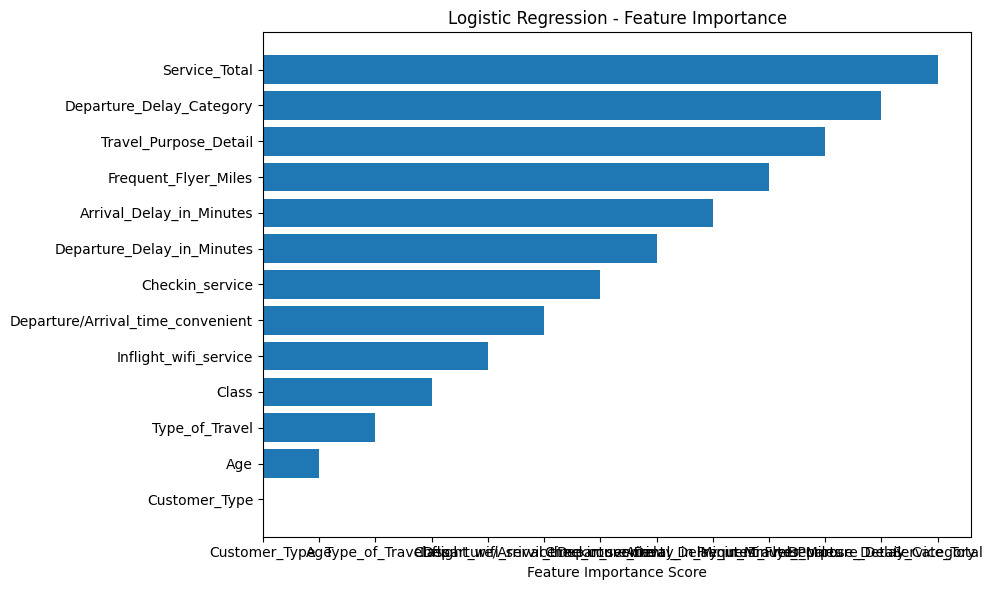

In [144]:
feature_importance = logreg.feature_names_in_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Logistic Regression - Feature Importance")
plt.tight_layout()
plt.show()

Overall, the model is 79% accurate. - With more inclination to detect if the customer is dissatisfied.


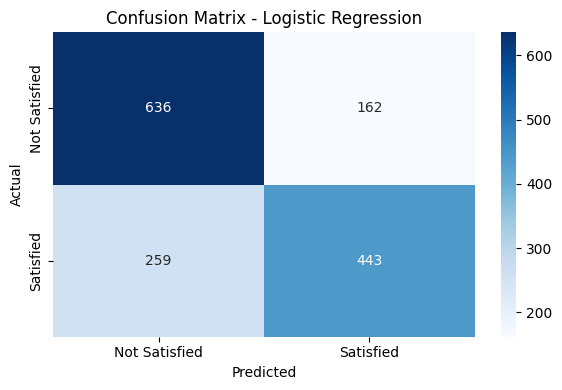

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Satisfied', 'Satisfied']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

In [85]:
#2. KNN algorithm

from sklearn.neighbors import KNeighborsClassifier

In [145]:
# You can start with k=11 (default) or experiment
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [146]:
y_pred_knn = knn.predict(X_test)

# Evaluation
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Not Satisfied', 'Satisfied']))

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_knn):.4f}")

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"\n✅ Recall Score: {recall_score(y_test, y_pred_knn):.4f}")
print(f"\n✅ Precision Score: {precision_score(y_test, y_pred_knn):.4f}")
print(f"\n✅ F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

🔍 Confusion Matrix:
[[639 159]
 [545 157]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.54      0.80      0.64       798
    Satisfied       0.50      0.22      0.31       702

     accuracy                           0.53      1500
    macro avg       0.52      0.51      0.48      1500
 weighted avg       0.52      0.53      0.49      1500


✅ Accuracy Score: 0.5307

✅ Accuracy Score: 0.5307

✅ Recall Score: 0.2236

✅ Precision Score: 0.4968

✅ F1 Score: 0.3084


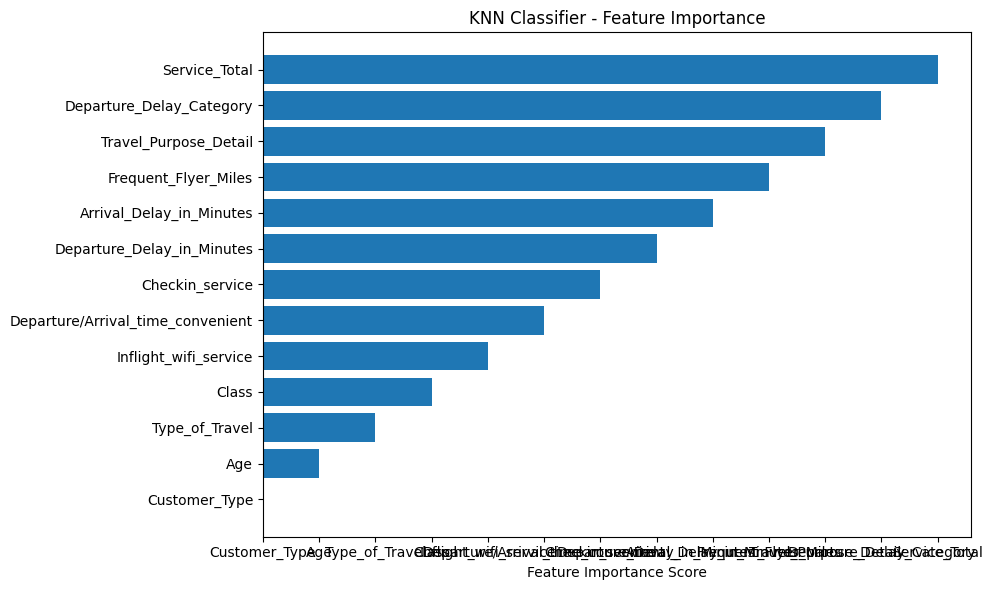

In [88]:
feature_importance = knn.feature_names_in_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("KNN Classifier - Feature Importance")
plt.tight_layout()
plt.show()

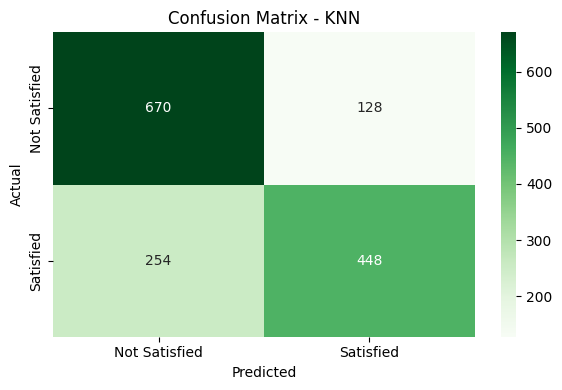

In [89]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
labels = ['Not Satisfied', 'Satisfied']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [90]:
#3. Use the decision tree model

from sklearn.tree import DecisionTreeClassifier

In [147]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [148]:
y_pred_dt = dtree.predict(X_test)

# Evaluation
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Satisfied', 'Satisfied']))

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ Recall Score: {recall_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ Precision Score: {precision_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ F1 Score: {f1_score(y_test, y_pred_dt):.4f}")


🔍 Confusion Matrix:
[[617 181]
 [227 475]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.73      0.77      0.75       798
    Satisfied       0.72      0.68      0.70       702

     accuracy                           0.73      1500
    macro avg       0.73      0.72      0.73      1500
 weighted avg       0.73      0.73      0.73      1500


✅ Accuracy Score: 0.7280

✅ Accuracy Score: 0.7280

✅ Recall Score: 0.6766

✅ Precision Score: 0.7241

✅ F1 Score: 0.6996


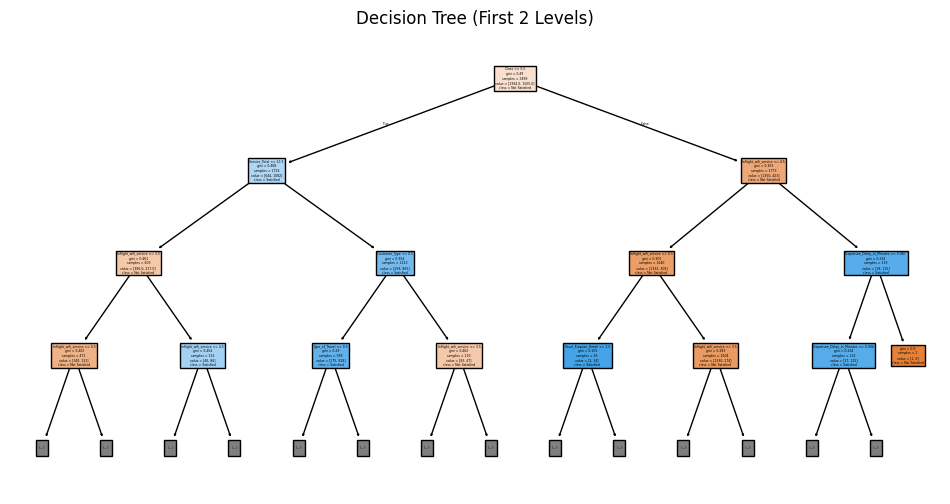

In [93]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(dtree, max_depth=3, feature_names=X.columns, class_names=['Not Satisfied', 'Satisfied'], filled=True)
plt.title("Decision Tree (First 2 Levels)")
plt.show()

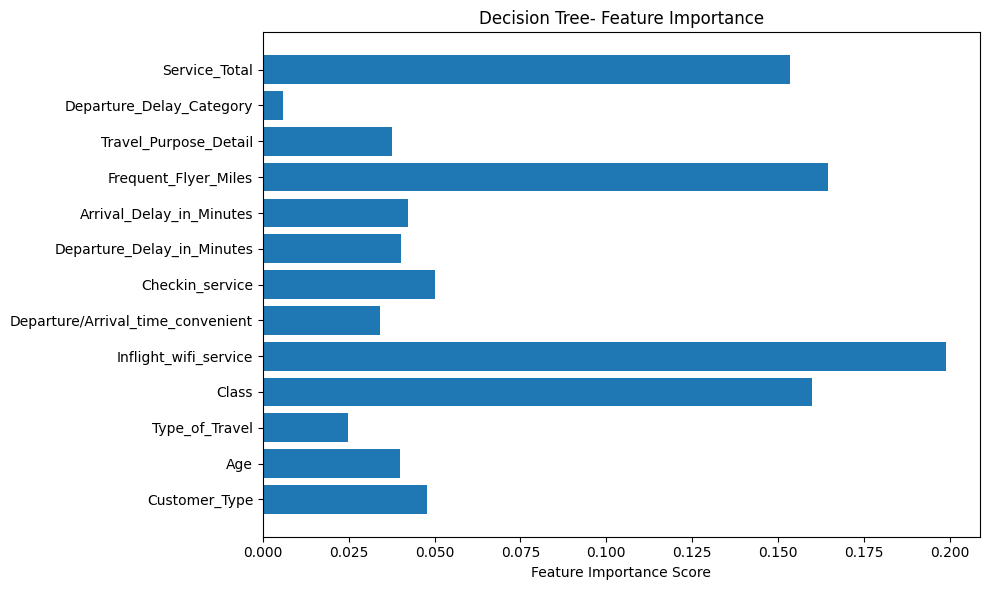

In [94]:
feature_importance = dtree.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Decision Tree- Feature Importance")
plt.tight_layout()
plt.show()

In [149]:
#4. Random Forest Classifier

# Train Random Forest Model
clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [150]:
# Evaluate Model
y_pred = clf.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

Predicted    0    1
Actual             
0          713   85
1          173  529


In [151]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Individual metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0,)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
 [[713  85]
 [173 529]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       798
           1       0.86      0.75      0.80       702

    accuracy                           0.83      1500
   macro avg       0.83      0.82      0.83      1500
weighted avg       0.83      0.83      0.83      1500

Accuracy: 0.83
Precision: 0.86
Recall: 0.75
F1-Score: 0.80


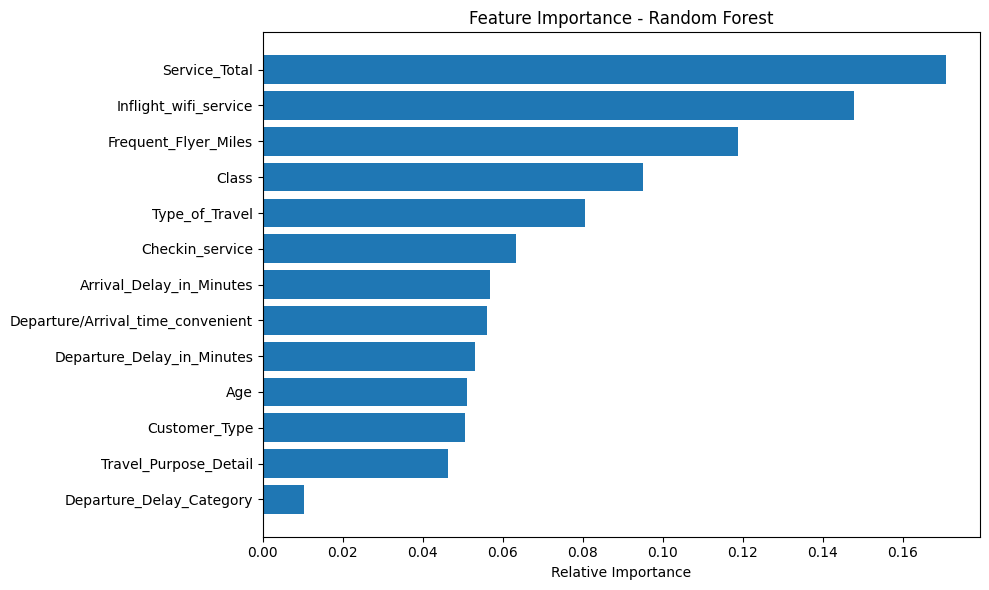

In [152]:
# Get feature importances
importances = clf.feature_importances_
features = X.columns

# Combine into DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [ ]:
#Inspect using AUTO AI

In [153]:
pip install xgboost

In [100]:
from xgboost import XGBClassifier

In [154]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # use_label_encoder=False to suppress warning
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [155]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)


print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.82
Accuracy: 0.83
Precision: 0.85
Recall: 0.75
F1-Score: 0.80


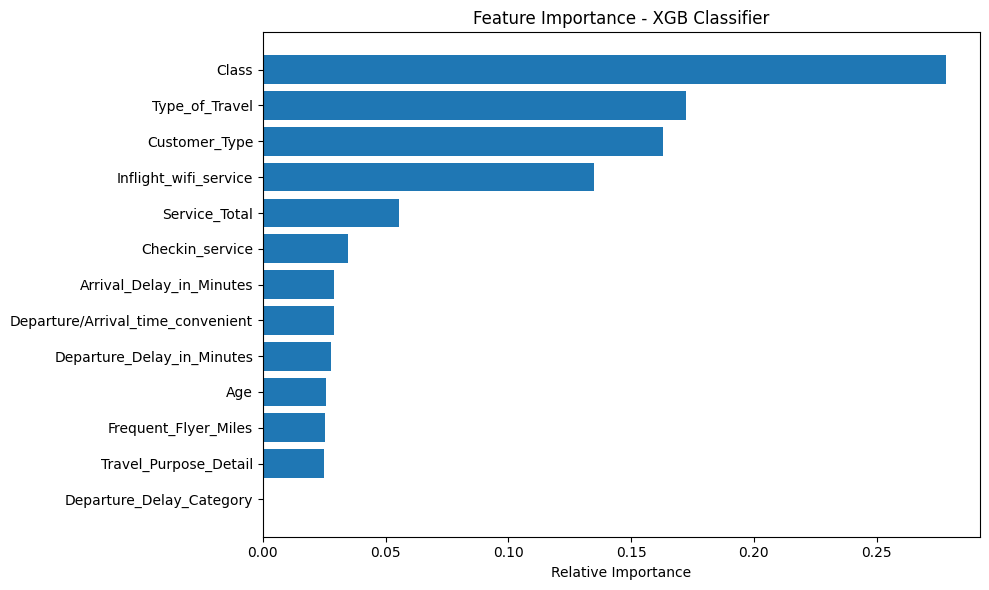

In [156]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Combine into DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - XGB Classifier')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [105]:
from lazypredict.Supervised import LazyClassifier

In [157]:

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LazyPredict model benchmarking
autoAI = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = autoAI.fit(X_train, X_test, y_train, y_test)

# Show model performance
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1505, number of negative: 1994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 3499, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430123 -> initscore=-0.281350
[LightGBM] [Info] Start training from score -0.281350
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.83               0.83     0.83      0.83   
RandomForestClassifier             0.83               0.82     0.82      0.82   
LGBMClassifier                     0.83               0.82     0.82      0.82   
XGBClassifier                      0.82  

In [107]:
from sklearn.ensemble import GradientBoostingClassifier


In [158]:
# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [159]:
y_pred = gb_model.predict(X_test)

In [160]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8286666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       798
           1       0.86      0.76      0.81       702

    accuracy                           0.83      1500
   macro avg       0.83      0.82      0.83      1500
weighted avg       0.83      0.83      0.83      1500


Confusion Matrix:
 [[709  89]
 [168 534]]


In [161]:
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.86
Recall: 0.76
F1-Score: 0.81


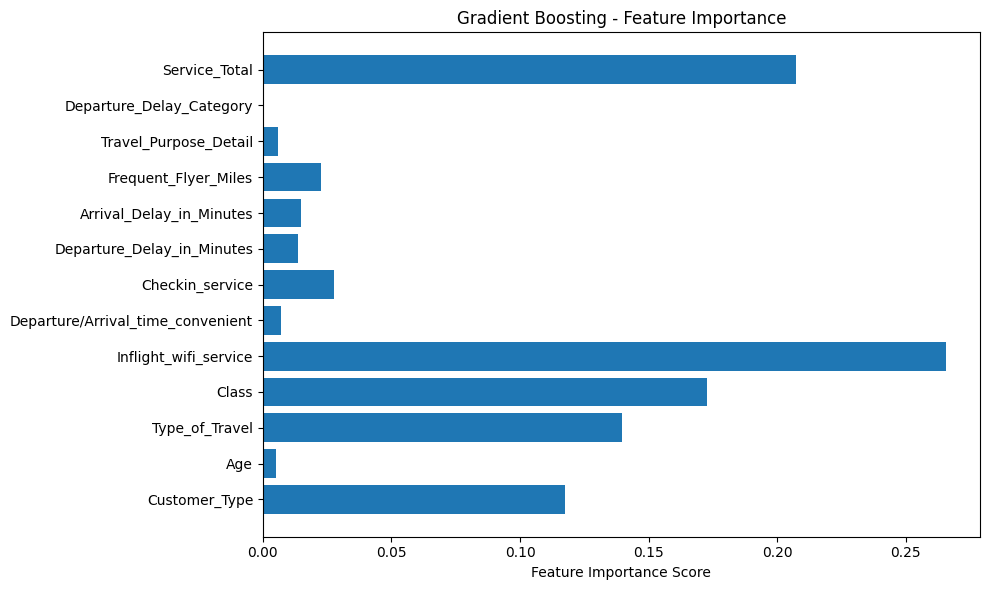

In [162]:
feature_importance = gb_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Gradient Boosting - Feature Importance")
plt.tight_layout()
plt.show()